In [61]:
# Beat tracking example
import librosa, librosa.display
import matplotlib.pyplot as plt

# 1. Get the file path to the included audio example
filename = librosa.util.example_audio_file()

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)

Estimated tempo: 129.20 beats per minute
Saving output to beat_times.csv


In [3]:
!pwd
!ls

/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin
EDA.ipynb      beat_times.csv


In [4]:
!ls

EDA.ipynb      beat_times.csv


In [5]:
!pwd

/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin


In [203]:
% matplotlib inline
import os
import logging
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import importlib

import IPython.display as ipd

import pandas as pd
import librosa

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV


sound_folder_root = '../data/trial_data/'

subfolders = ['crying', 'silence', 'noise', 'baby_laugh', 'aria_crying', 'aria_other']

folder_paths = [sound_folder_root + subfolder +'/' for subfolder in subfolders]


In [3]:
folder_paths

['../data/trial_data/crying/',
 '../data/trial_data/silence/',
 '../data/trial_data/noise/',
 '../data/trial_data/baby_laugh/',
 '../data/trial_data/aria_crying/',
 '../data/trial_data/aria_other/']

In [35]:

def dump_pickle(data, filename):
    with open(filename, 'wb') as picklefile:
        pickle.dump(data, picklefile)


In [43]:
%%time
raw_audio_data = []      
for folder in folder_paths:
    
    for file in os.listdir(folder):
        if file != '.DS_Store':
            raw, sr = librosa.load(folder+file, sr=44100)
            raw_audio_data.append((int('crying' in folder), raw, sr))

CPU times: user 4.47 s, sys: 1.47 s, total: 5.94 s
Wall time: 7.55 s


In [44]:
dump_pickle(raw_audio_data, '../data/pickles/raw_audio_data.pkl')


In [46]:
raw_audio_data[0]

(1, array([-1.2207031e-04, -1.8310547e-04, -1.8310547e-04, ...,
        -3.0517578e-05, -3.0517578e-05, -3.0517578e-05], dtype=float32), 44100)

In [51]:
df = pd.DataFrame(raw_audio_data, columns=['label', 'raw_audio', 'sampling_rate'])

In [52]:
df['vec_len'] = df['raw_audio'].apply(len)

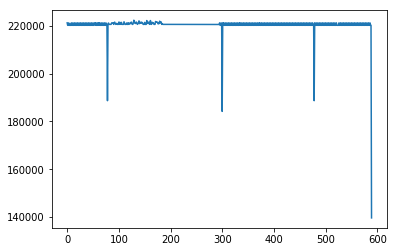

In [58]:
df['vec_len'].plot()

In [84]:
df = df[df['vec_len']>=220160]

In [76]:
print(df['vec_len'].value_counts())
max_length = df['vec_len'].max()

220160    245
221184    125
220500    108
220544     39
221120     17
220864     10
221504      9
220992      6
221248      5
221632      5
221376      4
222016      2
222144      2
188640      2
221440      2
221888      1
220736      1
222272      1
220608      1
184167      1
220672      1
221760      1
220800      1
139629      1
Name: vec_len, dtype: int64


In [75]:
vec = raw_audio_data[0][1]

len(vec)/max_length

0.9951050964583933

In [77]:
220160/max_length


0.9904981284192341

In [79]:
def map_vec_length(vec):
    if len(vec) < 220160:
        df.drop

array([44100])

In [173]:
import feature_engineering
importlib.reload(feature_engineering)

<module 'feature_engineering' from '/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin/feature_engineering.py'>

In [179]:
%%time

audio_dicts = []

for raw in raw_audio_data:
    
    
    f = feature_engineering.Features(raw)
    mat, label, _ = f.engineer_features()
    
    left_cols = ['zcr',
                  'rmse',
                  'spectral_centroid',
                  'spectral_rolloff',
                  'spectral_bandwidth',
                 ]

    cols_mfcc = ['mfcc_'+str(num) 
                 if len(str(num))==2 
                 else 'mfcc_0'+str(num) 
                 for num in range(mat.shape[0]-len(left_cols))
                ]   # list of strings for DF header

    cols = ['label'] + left_cols + cols_mfcc
    
    audio_dicts.append(dict(zip(cols, np.concatenate(([label], mat)))))
     
    

zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid

zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid

zcr:  (1, 432)
rmse:  (1, 432)
mfcc:  (13, 432)
spect centroid:  (1, 432)
spect rolloff:  (1, 432)
spectral_bandwidth_feat:  (1, 432)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 432)
rmse:  (1, 432)
mfcc:  (13, 432)
spect centroid:  (1, 432)
spect rolloff:  (1, 432)
spectral_bandwidth_feat:  (1, 432)
zcr:  (1, 435)
rmse:  (1, 435)
mfcc:  (13, 435)
spect centroid:  (1, 435)
spect rolloff:  (1, 435)
spectral_bandwidth_feat:  (1, 435)
zcr:  (1, 434)
rmse:  (1, 434)
mfcc:  (13, 434)
spect centroid:  (1, 434)
spect rolloff:  (1, 434)
spectral_bandwidth_feat:  (1, 434)
zcr:  (1, 432)
rmse:  (1, 432)
mfcc:  (13, 432)
spect centroid:  (1, 432)
spect rolloff:  (1, 432)
spectral_bandwidth_feat:  (1, 432)
zcr:  (1, 432)
rmse:  (1, 432)
mfcc:  (13, 432)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid

zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid:  (1, 433)
spect rolloff:  (1, 433)
spectral_bandwidth_feat:  (1, 433)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 431)
rmse:  (1, 431)
mfcc:  (13, 431)
spect centroid:  (1, 431)
spect rolloff:  (1, 431)
spectral_bandwidth_feat:  (1, 431)
zcr:  (1, 433)
rmse:  (1, 433)
mfcc:  (13, 433)
spect centroid

In [202]:
df = pd.DataFrame(audio_dicts)
df.head()

,label,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
0,1.0,-768.375664,105.045447,-48.949625,1.243086,0.177494,-28.584826,-2.281126,-6.560057,-10.927984,1.245538,-6.056558,-3.985274,1.851007,0.000310,4696.654081,4268.093544,11677.112916,0.102963
1,1.0,-737.325370,91.279526,-33.206541,-3.191256,1.915339,-24.201259,-7.922937,-4.498896,-10.175341,-2.898555,-5.404584,-6.221960,-0.746833,0.000458,4355.717348,3832.486356,9814.993860,0.095094
2,1.0,-743.969335,128.795867,-54.660412,0.884953,1.064819,-30.957344,-0.893344,-11.192552,-15.319531,2.526045,-8.431053,-5.775144,1.979822,0.000377,4131.406059,3591.843705,8890.015385,0.089624
3,1.0,-708.806721,134.797340,-49.032352,3.078373,-0.894575,-36.447055,-8.697726,-12.577379,-14.441062,0.626627,-6.177967,-2.175907,4.224580,0.000839,3639.249503,3076.146098,7226.005882,0.076038
4,1.0,-707.520214,101.020843,-51.507393,4.015465,-1.706717,-33.051905,-4.922206,-7.652123,-9.674420,0.876348,-7.134992,-3.033374,3.011047,0.000731,3902.619221,3766.007534,8733.087795,0.108653


In [204]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),
                                                    df['label'], 
                                                    test_size=0.2)


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.0]}
svcgs = SVC()
clf = GridSearchCV(svcgs, parameters)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        71
        1.0       0.95      0.89      0.92        47

avg / total       0.94      0.94      0.94       118



In [ ]:
pipe = Pipeline()

<class 'numpy.ndarray'> (1025, 431) 15.781399 -64.2186


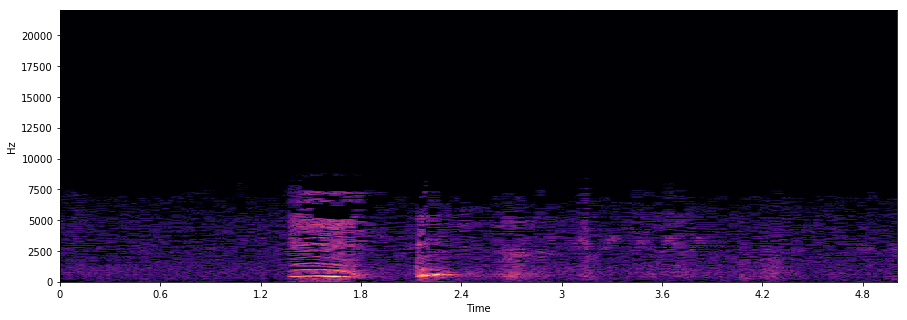

In [97]:
S = librosa.amplitude_to_db(abs(X))
print(type(S),S.shape, S.max(), S.min())

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

In [98]:
S

array([[-54.485836, -62.160904, -64.2186  , ..., -64.2186  , -54.38948 ,
        -47.878414],
       [-53.81979 , -59.034916, -64.2186  , ..., -64.2186  , -53.025826,
        -45.900642],
       [-53.291466, -59.279057, -64.2186  , ..., -50.016945, -47.34986 ,
        -46.201363],
       ...,
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ],
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ],
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ]], dtype=float32)

In [99]:
S1

array([[1.8867230e-03, 7.7974919e-04, 3.1859204e-04, ..., 1.9189759e-04,
        1.9077692e-03, 4.0371912e-03],
       [2.0370912e-03, 1.1175172e-03, 1.4965958e-04, ..., 5.4216034e-05,
        2.2320745e-03, 5.0695338e-03],
       [2.1648449e-03, 1.0865437e-03, 1.2822979e-04, ..., 3.1561144e-03,
        4.2904895e-03, 4.8970194e-03],
       ...,
       [2.5215882e-04, 1.2935848e-04, 1.7410316e-04, ..., 1.5223165e-04,
        2.6926372e-04, 3.9335192e-04],
       [2.9504715e-04, 3.0656139e-04, 2.3115681e-04, ..., 1.0605803e-04,
        2.4037137e-04, 3.3937808e-04],
       [2.3181258e-04, 6.0356902e-05, 3.6950648e-04, ..., 2.2343046e-04,
        8.3969899e-06, 2.1866465e-04]], dtype=float32)

## The Mel-Spectrogram

(128, 861)

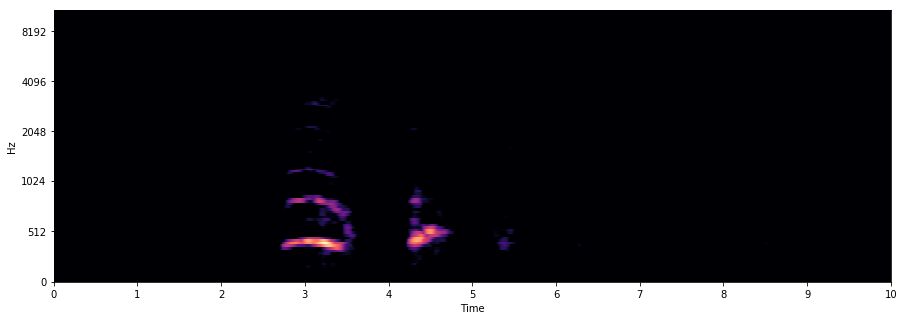

In [104]:
MS = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
logS = librosa.amplitude_to_db(MS)

plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

logS.shape

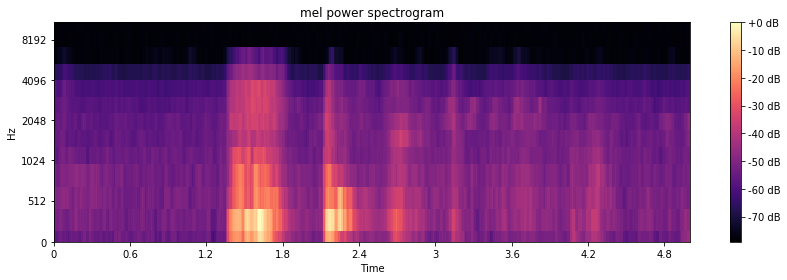

In [106]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=13)#128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


In [122]:
mfccs = librosa.feature.mfcc(y, n_mfcc=20, sr=sr)
print(mfccs.shape)

(20, 431)


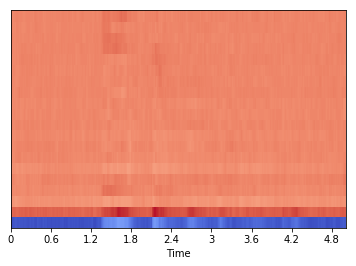

In [123]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[ 1.88300007e-16 -1.39486257e-16  1.13211837e-16 -1.18492481e-17
  3.40021901e-17 -6.38829026e-17  1.00976201e-16  1.00461016e-17
  1.95770185e-17 -5.74430938e-17  2.06073879e-18  2.67896043e-17
  1.80314644e-17 -2.42136808e-17 -6.69740108e-17  1.15916557e-17
 -7.40578004e-19 -2.24749325e-17  4.14723682e-17  2.38272923e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


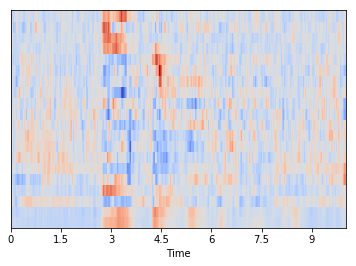

In [223]:
import sklearn

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


In [224]:
mfccs.mean(axis=1)

array([ 1.88300007e-16, -1.39486257e-16,  1.13211837e-16, -1.18492481e-17,
        3.40021901e-17, -6.38829026e-17,  1.00976201e-16,  1.00461016e-17,
        1.95770185e-17, -5.74430938e-17,  2.06073879e-18,  2.67896043e-17,
        1.80314644e-17, -2.42136808e-17, -6.69740108e-17,  1.15916557e-17,
       -7.40578004e-19, -2.24749325e-17,  4.14723682e-17,  2.38272923e-17])

## Model Prototype
- Make a dictionary: {.wav string : ndarray
Goal:
Cols 

In [160]:
mfccs.shape[0]
feature_cols_mfcc = ['mfcc_'+str(num) if len(str(num))==2 else 'mfcc_0'+str(num) for num in range(mfccs.shape[0])]   # list of strings for DF header

 

In [263]:
cry_data = []
for file in (cry_list + silent_list):
    
    y, sr = librosa.load(file, sr=44100)
    
    mfccs = librosa.feature.mfcc(y, n_mfcc=13, sr=sr)
    
    cry_data.append(dict(zip(['label'] + feature_cols_mfcc, [int('crying' in file)] + list(mfccs.mean(axis=1)))))
     

In [265]:
cry_data

[{'label': 1,
  'mfcc_00': -768.3756639102927,
  'mfcc_01': 105.04544690977885,
  'mfcc_02': -48.949624724408686,
  'mfcc_03': 1.243085838798432,
  'mfcc_04': 0.1774943830270187,
  'mfcc_05': -28.58482648308594,
  'mfcc_06': -2.281125860258373,
  'mfcc_07': -6.560056689567767,
  'mfcc_08': -10.92798372781611,
  'mfcc_09': 1.2455383684483539,
  'mfcc_10': -6.056558473936755,
  'mfcc_11': -3.98527383409727,
  'mfcc_12': 1.8510074760302018},
 {'label': 1,
  'mfcc_00': -737.3253701803525,
  'mfcc_01': 91.27952565894627,
  'mfcc_02': -33.20654135754905,
  'mfcc_03': -3.1912564290820042,
  'mfcc_04': 1.915339032398654,
  'mfcc_05': -24.201259158060545,
  'mfcc_06': -7.922936532874955,
  'mfcc_07': -4.498896201651541,
  'mfcc_08': -10.175341374332834,
  'mfcc_09': -2.8985552529254894,
  'mfcc_10': -5.40458392409557,
  'mfcc_11': -6.221960082367527,
  'mfcc_12': -0.7468326938846164},
 {'label': 1,
  'mfcc_00': -743.9693349262634,
  'mfcc_01': 128.79586729340107,
  'mfcc_02': -54.66041205804168

In [201]:
df

,label,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
0,1.0,-768.375664,105.045447,-48.949625,1.243086,0.177494,-28.584826,-2.281126,-6.560057,-10.927984,1.245538,-6.056558,-3.985274,1.851007,0.000310,4696.654081,4268.093544,11677.112916,0.102963
1,1.0,-737.325370,91.279526,-33.206541,-3.191256,1.915339,-24.201259,-7.922937,-4.498896,-10.175341,-2.898555,-5.404584,-6.221960,-0.746833,0.000458,4355.717348,3832.486356,9814.993860,0.095094
2,1.0,-743.969335,128.795867,-54.660412,0.884953,1.064819,-30.957344,-0.893344,-11.192552,-15.319531,2.526045,-8.431053,-5.775144,1.979822,0.000377,4131.406059,3591.843705,8890.015385,0.089624
3,1.0,-708.806721,134.797340,-49.032352,3.078373,-0.894575,-36.447055,-8.697726,-12.577379,-14.441062,0.626627,-6.177967,-2.175907,4.224580,0.000839,3639.249503,3076.146098,7226.005882,0.076038
4,1.0,-707.520214,101.020843,-51.507393,4.015465,-1.706717,-33.051905,-4.922206,-7.652123,-9.674420,0.876348,-7.134992,-3.033374,3.011047,0.000731,3902.619221,3766.007534,8733.087795,0.108653
5,1.0,-735.374496,101.771306,-39.029272,-1.134859,-1.020859,-27.094090,-4.305637,-7.388106,-12.864329,-0.322308,-5.743682,-4.704314,3.133778,0.000611,4332.295475,3883.305882,10370.610454,0.094784
6,1.0,-719.320258,94.172428,-31.534587,-3.739060,-1.598073,-25.670674,-7.120582,-8.449233,-14.633028,-1.286540,-3.500054,-5.213483,2.566259,0.000625,4096.952254,3660.283359,8983.292624,0.094690
7,1.0,-749.673243,122.343298,-53.861459,6.941743,1.606771,-34.477709,-2.522637,-10.147548,-13.112390,3.855360,-9.273767,-6.060432,5.006417,0.000354,4267.586052,3809.406858,9626.241095,0.096386
8,1.0,-749.691826,110.240495,-31.887717,-0.956716,2.069629,-25.302627,-5.547010,-6.321953,-12.662641,-0.458306,-4.723887,-5.136279,2.798139,0.000530,4430.683552,3802.666460,10487.415876,0.087520
9,1.0,-777.930953,112.348019,-40.177110,4.346391,4.337541,-24.898273,0.035947,-5.863305,-12.003978,2.347249,-6.934576,-4.489240,4.147684,0.000259,4761.330503,4179.485454,11690.480895,0.095284


In [91]:
import numpy as np
list_ = [range(5),np.nan]
any(list_)
all(list_)

True

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
#from sklearn_pandas import DataFrameMapper, GridSearchCV
from sklearn.model_selection import GridSearchCV

In [250]:
train, test = train_test_split(df, test_size=0.2)


In [ ]:
print(classification_report(y_))

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),df['label'], test_size=0.2) #, stratify=df['label'])



In [183]:
logit = LogisticRegression()
svc = SVC()

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100]}
svcgs = SVC()
clf = GridSearchCV(svcgs, parameters)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [197]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
roc_auc_score(y_test, y_pred)

0.9315501869427667

In [290]:
concat.shape

(18, 369)

In [292]:
pd.DataFrame(concat)

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
0,0.063477,0.095215,0.123535,0.119629,0.121094,0.117188,0.118652,0.120117,0.117188,0.116699,...,0.095215,0.088867,0.085938,0.094727,0.081543,0.057617,0.034180,0.004883,0.00000,0.00000
1,0.000052,0.000051,0.000052,0.000052,0.000051,0.000052,0.000053,0.000055,0.000057,0.000055,...,0.000059,0.000060,0.000058,0.000055,0.000047,0.000034,0.000024,0.000008,0.00000,0.00000
2,-817.816071,-805.647991,-803.553246,-808.905074,-810.614914,-809.605114,-804.305986,-800.174737,-800.637488,-802.151649,...,-799.985329,-798.394358,-801.670912,-808.720806,-819.165970,-850.117545,-966.427286,-1131.370850,-1131.37085,-1131.37085
3,76.107128,81.011545,83.946739,83.939707,84.122895,86.946023,91.956278,94.694985,95.026834,92.283259,...,104.419128,108.856695,105.143979,96.559339,90.083514,81.326220,68.256612,0.000000,0.00000,0.00000
4,-46.780137,-52.777577,-52.997306,-51.992924,-48.772826,-45.850875,-44.345970,-43.999956,-43.811157,-50.635482,...,-36.319606,-36.585547,-43.667213,-47.945274,-41.178261,-42.831431,-50.264386,0.000000,0.00000,0.00000
5,3.200761,-0.426217,2.327390,1.700025,0.920130,2.510577,4.728814,4.027228,2.665888,-1.845478,...,-4.090369,-5.335408,-7.517535,-6.473420,-6.372439,-0.867506,-0.645721,0.000000,0.00000,0.00000
6,2.819269,0.749026,5.783903,8.829027,5.643528,4.517905,5.323974,8.262104,10.810165,11.251998,...,4.552149,7.896367,15.104454,15.931106,11.141864,12.955966,8.168429,0.000000,0.00000,0.00000
7,-14.053236,-18.383585,-17.978960,-16.406194,-16.294492,-18.381668,-19.352272,-18.560038,-15.025434,-11.263978,...,-22.501926,-14.720946,-10.575527,-16.078378,-21.067564,-22.261733,-29.880531,0.000000,0.00000,0.00000
8,5.327186,3.953400,6.354701,8.968681,8.439512,6.162976,10.579429,9.510778,4.841742,3.622640,...,0.139129,5.035223,-0.396052,-1.481289,-5.716203,-4.606932,-11.020510,0.000000,0.00000,0.00000
9,3.205910,-0.518610,-2.484197,-4.557065,-2.199633,-3.058086,3.788005,3.829714,-1.067377,-0.685272,...,0.360679,4.409592,9.313913,11.070752,10.328481,9.871105,4.656722,0.000000,0.00000,0.00000


In [280]:
'Python'.__add__('ic')

'Pythonic'

In [281]:
from collections import Counter

c = Counter('gagggagagadd')

In [282]:
c

Counter({'a': 4, 'd': 2, 'g': 6})